# Displaying results for the signal detection benchmark

This notebooks loads the results of the benchmark and generates the figures shown in the paper.

In [1]:
from mcsm_benchs.Benchmark import Benchmark
from mcsm_benchs.ResultsInterpreter import ResultsInterpreter
from mcsm_benchs.SignalBank import SignalBank

import scipy.stats as spst
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
from numpy import pi as pi
import scipy.signal as sg
import matplotlib.pyplot as plt
from src.utilities.utilstf import get_spectrogram
import os

plt.rcParams['xtick.labelsize'] = 6.0
plt.rcParams['ytick.labelsize'] = 6.0
plt.rcParams['axes.labelsize'] =  7.0
# plt.rcParams['axes.title'] =  
plt.rc('axes', axisbelow=True)


In [2]:
# Load benchmark with detection results
filename = os.path.join('results','benchmark_detection_1024')
benchmark = Benchmark.load_benchmark(filename)

In [3]:
# Load interpreter.
interpreter = ResultsInterpreter(benchmark)
df = interpreter.rearrange_data_frame()
print(np.unique(df['Method']))

['APF' 'global_mad_test' 'global_rank_env_test' 'monte_carlo_test']


In [4]:
# Check DataFrame of results.
df = interpreter.rearrange_data_frame()

In [5]:
# from plotly.offline import iplot
# fig = interpreter.get_summary_plotlys()

# for f in fig:
#     f.update_layout(yaxis_title='Power', xaxis_title='SNRin (dB)')
#     iplot(f)

In [6]:
# Use this function for the CP CI shown in the interactive figures using matplotlib:
def clopper_pearson(x, alpha=0.05, bonferroni=1):
    """
    Clopper-Pearson confidence interval for Bernoulli parameter
    alpha: confidence level
    k: number of successes
    n: number of observations
    """
    alpha = alpha/bonferroni
    n = len(x) # k: number of successes
    k = sum(x) # n: number of observations
    lb = spst.beta.ppf(alpha/2, k, n-k+1) 
    ub = spst.beta.ppf(1 - alpha/2, k+1, n-k)
    return lb, ub

cp_ci = lambda x: clopper_pearson(x, alpha=0.05, bonferroni=8)

In [7]:
keep_in = ["{'fun': 'Fest', 'correction': 'rs', 'rmin': 0.65, 'rmax': 1.05, 'transform': 'asin(sqrt(.))'}",
           "{'fun': 'Fest', 'correction': 'rs', 'rmin': 0.65, 'rmax': 1.05}",
           "{'statistic': 'Frs', 'MC_reps': 199}",
           "{'statistic': 'Frs_vs', 'MC_reps': 199}",
           '((), {})'
           ]

In [8]:
df = df[df['Parameter'].isin(keep_in)]

In [9]:
np.unique(df['Method'])

array(['APF', 'global_mad_test', 'global_rank_env_test'], dtype=object)

LinearChirp


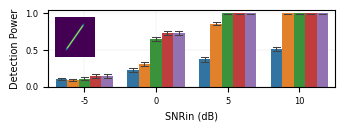

<Figure size 370x25 with 0 Axes>

In [ ]:
# Set figure size (in inches):
fig_size_w = 3.7
fig_size_h = 1.0
errbar_params = {'err_kws' : {'linewidth':0.75,}, 'capsize':0.5,}
figs = interpreter.get_summary_plots(   df_rearr=df,
                                        size = (fig_size_w,fig_size_h),
                                        # filter_crit='any',
                                        # filter_str=['global',"'pnorm': 2, 'rmax': 1.0,",],
                                        errbar_fun=cp_ci, 
                                        savetofile=False, 
                                        plot_type='bars',
                                        errbar_params=errbar_params)
for i, fig in enumerate(figs):
    # Get signal the signal for each figure and compute spectrogram
    ax = fig.axes[0]
    s = benchmark.signal_dic['LinearChirp']
    S, stft  = get_spectrogram(s)
    ax = fig.axes[0]

    # Set inset axis with the spectrogram of the signal
    axins = inset_axes(ax, width=0.4, height=0.4, loc=2)
    axins.imshow(S, origin='lower')
    axins.axis('off')
    fig.canvas.draw()
    axins.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False, right=False, left=False, labelleft=False)

    #Uncomment to remove legends from figure (they are print in another figure)
    ax.get_legend().remove()
    
    ax.set_title('')
    ax.set_ylim((0,1.05))
    fig.canvas.draw()
    
    # Save figure
    # filename = os.path.join('figures','power_'+str(i)+'_N_{}.pdf'.format(interpreter.N))
    # fig.savefig(filename, dpi=900, transparent=False, bbox_inches='tight')

# Fix new legends for a different figure
new_legends = [
            r"APF",    
            r'Global MAD-$F$',
            r'Global MAD-$\widetilde{F}$',
            r'Rank-$\widetilde{F}$',
            r'Rank-$F$',
            ]


# Get legends in a different figure
legendFig = plt.figure()
legendFig.set_size_inches((fig_size_w,0.25))

h,_ = figs[0].axes[0].get_legend_handles_labels()
legendFig.legend(h, new_legends, fontsize='small', frameon=False, loc='center', ncol=5)
legendFig.canvas.draw()

# Save figure with legends
# filename = os.path.join('figures','legend_power.pdf')
# legendFig.savefig(filename, dpi=900, transparent=False, bbox_inches='tight')

plt.show()